In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F

import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from helper import *
from models.enet.model import *

torch.cuda.set_device(0)

In [2]:
mean = [0.28689554, 0.32513303, 0.28389177]
std = [0.18696375, 0.19017339, 0.18720214]
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean = mean, std = std)
            ])
dataset = CityscapesDataset(transform = transform)
dataloader = data.DataLoader(dataset, batch_size = 2, shuffle = True, drop_last = True)

In [4]:
net = ENet(num_classes = 1)
net = net.cuda()

In [5]:
optimizer = torch.optim.Adam(net.parameters(), lr = 1e-3)
criterion = nn.BCEWithLogitsLoss()

In [5]:
# num_epochs = 2
# train_loss_list = list()
# for i in range(num_epochs) :
#     net.train()
#     trn = []
#     for idx, (img, mask) in enumerate(dataloader) :
#         img, mask = img.float(), mask.float()
#         if torch.cuda.is_available() :
#             img, mask = img.cuda(), mask.cuda()
            
#         out = net(img)
#         out = out.squeeze(1)
        
#         loss = criterion(out, mask)
        
#         trn.append(loss.item())
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#     train_loss = sum(trn) / len(trn)
#     train_loss_list.append(train_loss)
#     print('Epoch : ', i, ' of ', num_epochs, ' TL : ', round(train_loss, 6))

In [8]:
def train(model, train_loader, epoch, loss_function, optimiser):
    model.train()
    loop = tqdm(train_loader)
    for data, target in loop:
        data, target = data.float().cuda(), target.float().cuda()
        
        optimiser.zero_grad()
        prediction = model(data)
        prediction = prediction.squeeze(1)
        
        loss = loss_function(prediction, target)
        losses.append(loss.item())
        
        loss.backward()
        optimiser.step()
        
        loop.set_description('Epoch {}/{}'.format(epoch + 1, num_epochs))
        loop.set_postfix(loss = loss.item())

In [ ]:
num_epochs = 2
losses = []
for epoch in range(num_epochs) :
    train(model = net, train_loader = dataloader, loss_function = criterion, optimiser = optimizer, epoch = epoch)

In [10]:
torch.save(net.state_dict(), 'testing.pt')

In [3]:
net = ENet(num_classes = 1)
net.load_state_dict(torch.load('road_bce.pt', map_location = 'cpu'))

<All keys matched successfully>

In [4]:
net.cuda()
img, mask = next(iter(dataloader))
img = img.float().cuda()
out = net(img)

(2, 802, 2028)


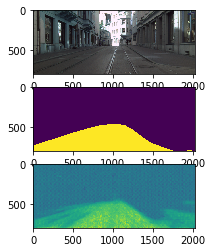

In [5]:
unorm = UnNormalize(mean = mean, std = std)
fig = plt.figure()
plt.subplot(3, 1, 1)
img2 = unorm(img)
img2 = img2.transpose(1, 2).transpose(2, 3).detach().cpu().numpy()
plt.imshow(img2[0])
plt.subplot(3, 1, 2)
plt.imshow(mask[0])
out2 = out.squeeze(1).detach().cpu().numpy()
print(out2.shape)
plt.subplot(3, 1, 3)
plt.imshow(out2[0])
plt.show()